# Machine Learning (CS535): Project Phase 2
## Implementation
#### Name: GROUP 24


## Libraries


In [12]:
import numpy as np
import pandas as pd
import os
import csv
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import collections
from collections import defaultdict

# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2')
import warnings
warnings.filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import validation_curve,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,balanced_accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

## Task 1: Feature Preparation
#### Task 1.1: Bag of Words and Embeddings Features

In [7]:
####### LOADING ALL CSVS

directory = "D:\LUMS\Fall Semester 2022\CS535 Machine Learning\Project\Phase 2"

unitedNations = pd.read_csv(os.path.join(directory, "UnitedNations_task2final.csv"))
chennaiIPL = pd.read_csv(os.path.join(directory, "ChennaiIPL_task2final.csv"))
shawnMendes = pd.read_csv(os.path.join(directory, "shawnmendes_task2final.csv"))
manCity = pd.read_csv(os.path.join(directory, "ManCity_task2final.csv"))
natGeo = pd.read_csv(os.path.join(directory, "NatGeo_task2final.csv")


                                                  Text  Label
0                  landing new zeal nzvind whistlepodu      4
1    superking game resuming anbuden whistlepodu ye...      4
2    click dash championforever nostalgia whistlepo...      4
3                             itsomihere_ yellove need      4
4    best view sun rises anbuden horizon send chenn...      4
..                                                 ...    ...
980  dhonifan183 harbouring lot yellove thoothukudi...      4
981                  itsanbuchelvan lots anbu birthday      4
982                    cricketfan86 one biryani parcel      4
983                       cricharsha home away anbuden      4
984              iam__hariii fellow maduraikarans like      4

[985 rows x 2 columns]


In [8]:
###### MERGING TWEETS

chennaiIPLDirectory = os.path.join(directory, "ChennaiIPL_task2final.csv")
manCityDirectory = os.path.join(directory, "ManCity_task2final.csv")
natGeoDirectory = os.path.join(directory, "NatGeo_task2final.csv")
unitedNationsDirectory = os.path.join(directory, "UnitedNations_task2final.csv")
shawnMendesDirectory = os.path.join(directory, "shawnmendes_task2final.csv")


df = pd.concat(map(pd.read_csv, [chennaiIPLDirectory, manCityDirectory,natGeoDirectory,unitedNationsDirectory,shawnMendesDirectory]), ignore_index=True)
print(df)





                                                   Text  Label
0                   landing new zeal nzvind whistlepodu      4
1     superking game resuming anbuden whistlepodu ye...      4
2     click dash championforever nostalgia whistlepo...      4
3                              itsomihere_ yellove need      4
4     best view sun rises anbuden horizon send chenn...      4
...                                                 ...    ...
4790      making of shawnmendesthealbum lost in japan x      3
4791               today come listen to the album on me      3
4792  will be on at 525p friday go get tickets now at x      3
4793                     london popup open today only x      3
4794                                  530pm bst tune in      3

[4795 rows x 2 columns]


In [25]:
####### MERGING TWEETS AND FINDING EMBEDDINGS

totalTweets = list()
embeddingsDict = dict()

mergedData = pd.read_csv(os.path.join(directory, "MergedData.csv"))
totalContent = mergedData['Text']

for i in range(0,len(totalContent)):
    totalTweets.append(str(totalContent[i]))


embeddings = model.encode((totalTweets))


for tweet, embedding in zip(totalTweets, embeddings):
    embeddingsDict[tweet] = embedding


In [30]:
print(embeddings)

[[-0.05565132  0.02357229 -0.02582251 ... -0.02702088 -0.04938103
  -0.02832163]
 [-0.03880106 -0.06732698 -0.03215253 ... -0.04838313 -0.13146538
   0.02110627]
 [-0.01367085 -0.00649651 -0.0368962  ...  0.04952671 -0.00329407
   0.02946125]
 ...
 [-0.0587766  -0.06873836  0.00943033 ... -0.01108198 -0.08024298
  -0.01335058]
 [ 0.02558943 -0.05104619  0.07632182 ... -0.00955038 -0.02969265
   0.0368358 ]
 [ 0.00086982 -0.02455385  0.0031702  ... -0.07750769 -0.03145003
  -0.06876114]]
4795


In [11]:
######## LOADING MERGED DATA FROM CSV

all_data = []
data = ""
with open('MergedData.csv', encoding="utf8") as file_obj:
    reader_obj = csv.reader(file_obj)
    for row in reader_obj:
        all_data.append(row)
        data = data + " " + row[0]
data = data.split()
data = set(data)


In [14]:
###### LOADING EMBEDDINGS CSV

embedding_data = []
with open('embeddings_df.csv', encoding="utf8") as file_obj:
    reader_obj = csv.reader(file_obj)
    for row in reader_obj:
        embedding_data.append(row)


In [15]:
##### HELPER FUNCTION FOR BOW

def index_provider(vacablary):
    vacab_word_index = 0
    index_word = {}
    for word in vacablary:
        index_word[word] = vacab_word_index 
        vacab_word_index += 1

    return index_word

In [78]:
#### HELPER FUNCTION FOR BOW

def BOW_calculator(sent,index_word,vacablary):
    count_dict = defaultdict(int)
    vec = np.zeros(len(vacablary))
    for item in sent:
        count_dict[item] += 1
    for key,item in count_dict.items():
        vec[index_word[key]] = item
    return vec 

In [24]:
##### FUNCTION FOR BOW


def bag_words_d_and_actual_label_provider(all_data):
    all_tweets_array = np.array([])
    index_word = index_provider(data)
    vacablary = data
    actual_label = np.array([])
    for i in range (1,len(all_data)):
        tweet_data = all_data[i][0].split()
        actual_label = np.append(actual_label,int(all_data[i][1]))
        bag_of_word = BOW_calculator(tweet_data,index_word,vacablary)
        all_tweets_array = np.append(all_tweets_array,bag_of_word )

    all_tweets = all_tweets_array.reshape(len(all_tweets_array)//len(vacablary),len(vacablary))
    Data_frame = pd.DataFrame(all_tweets)
    w_file_name = "bags_of_word.csv"
    Data_frame.to_csv(w_file_name)
    print(len(all_tweets[0]))
    return all_tweets,actual_label

In [19]:
##### FUNCTIONS FOR EMBEDDINGS 

def Embedding_data_and_actual_label_provider(embedded_data):
    all_tweet_array = np.array([])
    actual_l = np.array([])
    for i in range (1,len(embedded_data)):
        actual_l = np.append(actual_l,embedded_data[i][-1])
        all_tweet_array = np.append(all_tweet_array,embedded_data[i][:-1])
    print(len(all_tweet_array)//(len(embedded_data)-1))
    print(len(embedded_data)-1)
    all_tweet = all_tweet_array.reshape(len(embedded_data)-1,len(all_tweet_array)//(len(embedded_data)-1))
    print(all_tweet.shape)
    return all_tweet,actual_l

In [2]:
#### USED IN THE CREATION OF EMBEDDINGS_DF AND BOW 

all_tweet,actual_l = Embedding_data_and_actual_label_provider(embedding_data)
all_tweets,actual_label = bag_words_d_and_actual_label_provider(all_data)

In [6]:
#### LOADING BOW AND EMBEDDINGS 

bag_of_words = pd.read_csv('bag_of_words.csv', header=None)
bag_of_words = np.array(bag_of_words)
labels = pd.read_csv('labels.csv', header=None)
labels = np.array(labels)

bag_of_words = bag_of_words[1:, 1:]
labels = labels[1:, 1:]

embeddings = pd.read_csv('embeddings_df.csv')
embeddings = np.array(embeddings)
embeddings = embeddings[0:, :-1]
# print(embeddings.shape)

In [4]:
def ttsplit(data, labels):
    trainingData = np.concatenate((data, labels), axis=1)
    np.random.shuffle(trainingData)
    X_train, X_test, y_train, y_test = train_test_split(trainingData[:, :-1],trainingData[:, -1], test_size=0.15, random_state=42)
    return X_train, X_test, y_train, y_test

# Task 2: KNN

In [7]:
X_train_e,X_test_e,y_train_e,y_test_e = ttsplit(embeddings, labels)
X_train_b,X_test_b,y_train_b,y_test_b = ttsplit(bag_of_words, labels)

In [8]:
model = KNeighborsClassifier(n_neighbors=3)

In [82]:
model.fit(X_train_b, y_train_b)
cv_scores_b = cross_val_score(model, X_train_b, y_train_b, cv=5)
print(cv_scores_b)
y_predicted = model.predict(X_test_b)

[0.67057292 0.76401565 0.76140808 0.74185137 0.73663625]


### BAG OF WORDS

BAG OF WORDS
              precision    recall  f1-score   support

         0.0       1.00      0.56      0.72       337
         1.0       0.63      0.82      0.71       159
         2.0       0.76      0.94      0.84       157
         3.0       0.68      0.79      0.73       145
         4.0       0.78      0.99      0.88       161

    accuracy                           0.77       959
   macro avg       0.77      0.82      0.78       959
weighted avg       0.82      0.77      0.77       959



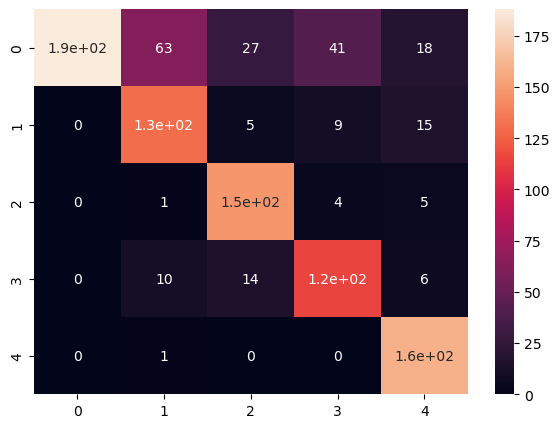

In [83]:
print("BAG OF WORDS")
###### CLASSIFICATION REPORT
print(classification_report(y_predicted,y_test_b))

###### CONDUSION MATRIX 
confusion_matrics = confusion_matrix(y_predicted,y_test_b)
final_confusion_matrix = pd.DataFrame(confusion_matrics, index = [i for i in "01234"],columns = [i for i in "01234"])
plt.figure(figsize = (7,5))
sns.heatmap(final_confusion_matrix, annot=True)
parameter_range = np.arange(1, 10, 1)


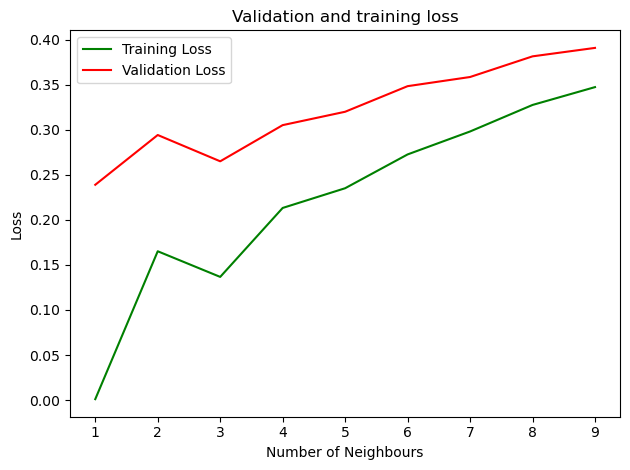

In [84]:
###### VALIDATION CURVE 
Training_data_accuracy, Validation_data_accuray = validation_curve(KNeighborsClassifier(), X_train_b, y_train_b,param_name = "n_neighbors",param_range = parameter_range,cv = 5, scoring = "accuracy")
mean_train_accuracy = np.mean(Training_data_accuracy, axis = 1) 
mean_validation_accuracy = np.mean(Validation_data_accuray, axis = 1)
hundred_array = np.full(len(mean_train_accuracy),1)
train_loss = hundred_array - mean_train_accuracy
validation_loss = hundred_array - mean_validation_accuracy

plt.plot(parameter_range, train_loss,label = "Training Loss", color = 'g')
plt.plot(parameter_range, validation_loss,label = "Validation Loss", color = 'r')
 
plt.title("Validation and training loss")
plt.xlabel("Number of Neighbours")
plt.ylabel("Loss")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

### EMBEDDINGS

In [9]:
model.fit(X_train_e, y_train_e)
cv_scores_e = cross_val_score(model, X_train_e, y_train_e, cv=5)
print(cv_scores_e)
y_predicted = model.predict(X_test_e)

[0.89202454 0.89693252 0.91779141 0.89570552 0.91411043]


EMBEDDINGS
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91       182
         1.0       0.86      0.90      0.88       147
         2.0       0.91      0.96      0.93       130
         3.0       0.83      0.84      0.84       108
         4.0       0.93      0.97      0.95       153

    accuracy                           0.91       720
   macro avg       0.90      0.91      0.90       720
weighted avg       0.91      0.91      0.91       720



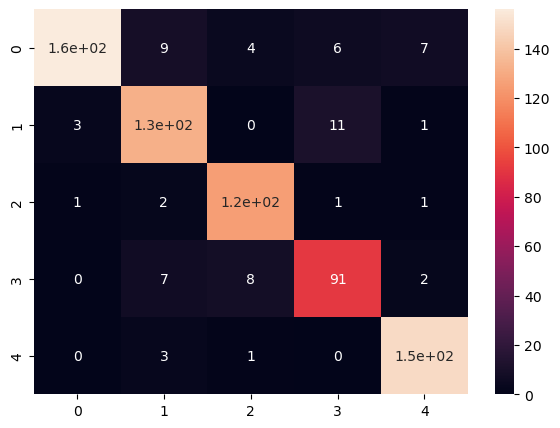

In [10]:
print("EMBEDDINGS")
###### CLASSIFICATION REPORT
print(classification_report(y_predicted,y_test_e))

###### CONDUSION MATRIX 
confusion_matrics = confusion_matrix(y_predicted,y_test_e)
final_confusion_matrix = pd.DataFrame(confusion_matrics, index = [i for i in "01234"],columns = [i for i in "01234"])
plt.figure(figsize = (7,5))
sns.heatmap(final_confusion_matrix, annot=True)
parameter_range = np.arange(1, 10, 1)

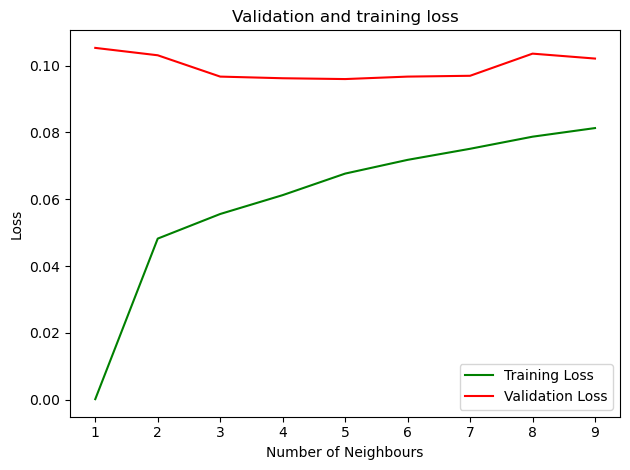

In [11]:
###### VALIDATION CURVE 
Training_data_accuracy, Validation_data_accuray = validation_curve(KNeighborsClassifier(), X_train_e, y_train_e,param_name = "n_neighbors",param_range = parameter_range,cv = 5, scoring = "accuracy")
mean_train_accuracy = np.mean(Training_data_accuracy, axis = 1) 
mean_validation_accuracy = np.mean(Validation_data_accuray, axis = 1)
hundred_array = np.full(len(mean_train_accuracy),1)
train_loss = hundred_array - mean_train_accuracy
validation_loss = hundred_array - mean_validation_accuracy

plt.plot(parameter_range, train_loss,label = "Training Loss", color = 'g')
plt.plot(parameter_range, validation_loss,label = "Validation Loss", color = 'r')
 
plt.title("Validation and training loss")
plt.xlabel("Number of Neighbours")
plt.ylabel("Loss")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

# Task 3: NN

### Function Definitions

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(64,32,16),activation="relu" , max_iter=2000, solver='sgd', alpha=1e-5, random_state=1)


In [42]:
def cross_entropy(predictions, targets, epsilon=1e-10):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce_loss = -np.sum(np.sum(targets * np.log(predictions + 1e-5)))/N
    print(ce_loss)
    return ce_loss



def cross_val(X_train, y_train, m):    
    trainSplitX, trainSplitY = np.split(X_train, m), np.split(y_train, m)
    t_loss, v_loss = [], []
    for i in range(m):
        evalX, evalY = trainSplitX[i], trainSplitY[i]
        trainX, trainY = np.concatenate(trainSplitX[:i] + trainSplitX[i+1:]), np.concatenate(trainSplitY[:i] + trainSplitY[i+1:])

        clf.fit(trainX, trainY)
#         print(clf.score(trainX, trainY))

        pred_train = clf.predict(trainX)
        pred_eval = clf.predict(evalX)

        print("Training Loss:")
        t_loss.append(cross_entropy(pred_train, trainY))
        print("Validation Loss:")
        v_loss.append(cross_entropy(pred_eval, evalY))
    return t_loss, v_loss

In [36]:
def graphs(t_loss, v_loss):
    plt.title("Training Loss")
    plt.plot(t_loss, label = "Training Loss", color = 'r')
    plt.figure()
    plt.title("Validation Loss")
    plt.plot(v_loss, label = "Validation Loss", color = 'b')
    plt.figure()


In [38]:
def predict(X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    print(sns.heatmap(confusion_matrix(y_test, preds)))

### BAG OF WORDS

Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       148
         1.0       0.95      0.76      0.84       147
         2.0       0.94      0.93      0.93       144
         3.0       0.92      0.87      0.89       136
         4.0       1.00      0.89      0.94       145

    accuracy                           0.89       720
   macro avg       0.91      0.89      0.89       720
weighted avg       0.91      0.89      0.89       720

AxesSubplot(0.125,0.11;0.62x0.77)


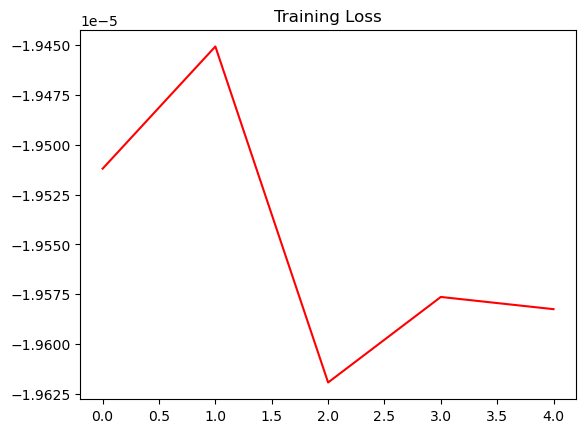

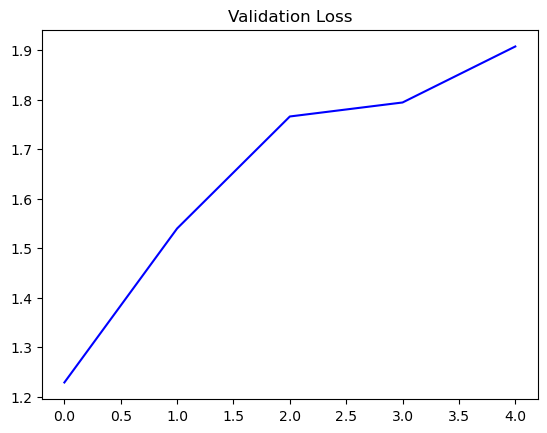

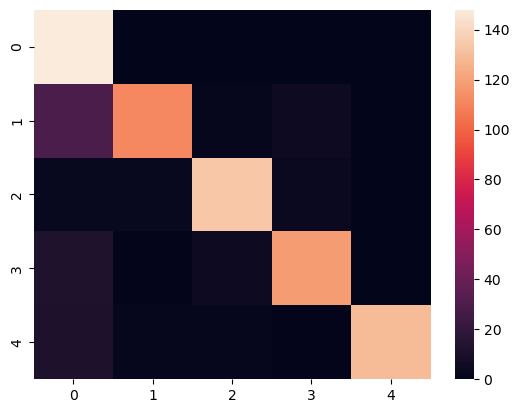

In [40]:
######## DRIVER CODE 
print("BAG OF WORDS")
X_train_b, X_test_b, y_train_b, y_test_b = ttsplit(bag_of_words, labels)
t_loss_b, v_loss_b = cross_val(X_train_b, y_train_b, 5)    
graphs(t_loss_b, v_loss_b)
predict(X_train_b, y_train_b, X_test_b, y_test_b)

### EMBEDDINGS

Accuracy: 0.9055555555555556
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       158
         1.0       0.91      0.87      0.89       147
         2.0       0.90      0.89      0.89       146
         3.0       0.82      0.89      0.85       126
         4.0       0.93      0.94      0.94       143

    accuracy                           0.91       720
   macro avg       0.90      0.90      0.90       720
weighted avg       0.91      0.91      0.91       720

AxesSubplot(0.125,0.11;0.62x0.77)


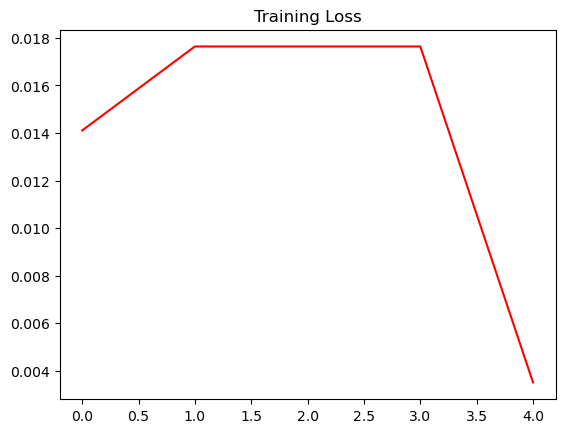

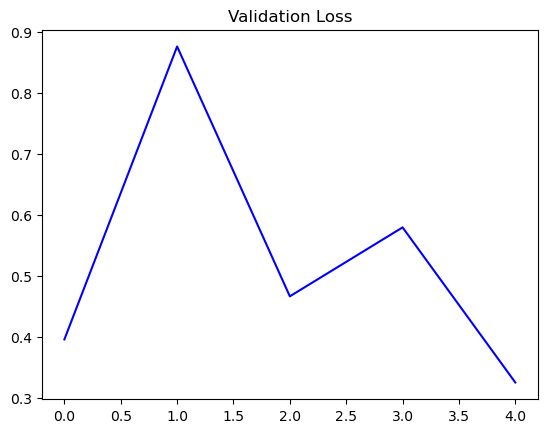

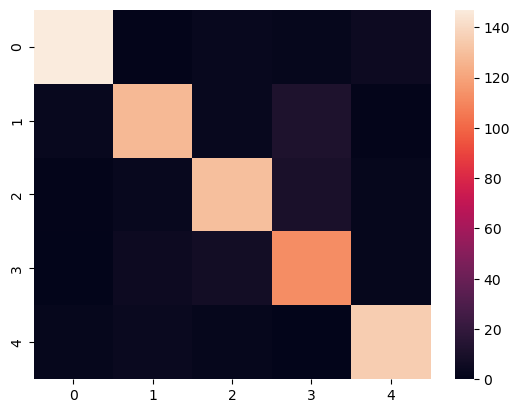

In [50]:
print("Embeddings")
X_train_e, X_test_e, y_train_e, y_test_e = ttsplit(embeddings, labels)
t_loss_e, v_loss_e = cross_val(X_train_e, y_train_e, 5)  
graphs(t_loss_e, v_loss_e)
predict(X_train_e, y_train_e, X_test_e, y_test_e)

# Task 4: Ensemble Methods

### BAG OF WORDS

### Using RandomForestClassifier

In [16]:
def rf_clf(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier()
    clf.fit(x_train, y_train)
    y_preds = clf.predict(x_test)
    labels = np.unique(y_test)
    
    accuracy = accuracy_score(y_test, y_preds)
    report = classification_report(y_test, y_preds, labels=labels, output_dict=False)
    cm = confusion_matrix(y_preds, y_test, labels=labels)
    return accuracy, report, cm

In [17]:
accuracy1, report1, cm1 = rf_clf(X_train_b, X_test_b, y_train_b, y_test_b)

Accuracy: 0.8861111111111111
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86       163
         1.0       0.96      0.77      0.85       151
         2.0       0.92      0.91      0.92       149
         3.0       0.89      0.84      0.87       122
         4.0       0.99      0.90      0.94       135

    accuracy                           0.89       720
   macro avg       0.90      0.88      0.89       720
weighted avg       0.90      0.89      0.89       720

[[163  31   4   8   9]
 [  0 116   1   1   3]
 [  0   0 135  10   1]
 [  0   3   9 103   1]
 [  0   1   0   0 121]]


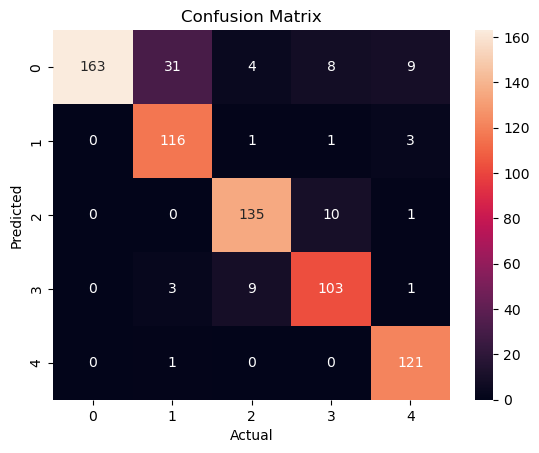

In [18]:
print("Accuracy:", accuracy1)
print(report1)
print(cm1)

ax = plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()

### Using Bagging

In [22]:
def baggingClassifier(x_train, x_test, y_train, y_test):
    bag_clf = BaggingClassifier(KNeighborsClassifier())
    bag_clf.fit(x_train, y_train)
    y_preds = bag_clf.predict(x_test)
    
    labels = np.unique(y_test)
    
    accuracy = accuracy_score(y_test, y_preds)
    report = classification_report(y_test, y_preds, labels=labels, output_dict=False)
    cm = confusion_matrix(y_preds, y_test, labels=labels)
    return accuracy, report, cm

In [23]:
accuracy2, report2, cm2 = baggingClassifier(X_train_b, X_test_b, y_train_b, y_test_b)

Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73       163
         1.0       0.93      0.64      0.76       151
         2.0       0.95      0.73      0.83       149
         3.0       0.77      0.76      0.77       122
         4.0       1.00      0.73      0.85       135

    accuracy                           0.78       720
   macro avg       0.85      0.77      0.79       720
weighted avg       0.84      0.78      0.78       720

[[163  49  21  24  25]
 [  0  96   1   0   6]
 [  0   1 109   5   0]
 [  0   5  18  93   5]
 [  0   0   0   0  99]]


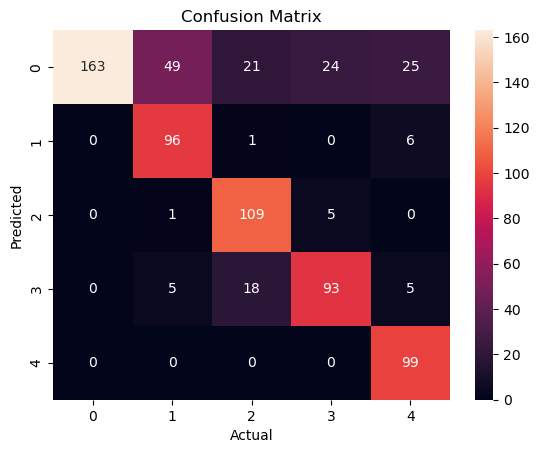

In [24]:
print("Accuracy:", accuracy2)
print(report2)
print(cm2)
ax = plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()

### Using Voting

In [27]:
def votingClassifier(x_train, x_test, y_train, y_test):
    r_clf = RandomForestClassifier()
    nb_clf = GaussianNB()
    lr_clf = LogisticRegression()
    
    v_clf = VotingClassifier(estimators=[("rf", r_clf), ("nb", nb_clf), ("lr", lr_clf)])
    v_clf.fit(x_train, y_train)
    y_preds = v_clf.predict(x_test)
    
    labels = np.unique(y_test)
    
    accuracy = accuracy_score(y_test, y_preds)
    report = classification_report(y_test, y_preds, labels=labels, output_dict=False)
    cm = confusion_matrix(y_preds, y_test, labels=labels)
    return accuracy, report, cm

In [28]:
accuracy3, report3, cm3 = votingClassifier(X_train_b, X_test_b, y_train_b, y_test_b)

Accuracy: 0.9
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86       163
         1.0       0.97      0.79      0.87       151
         2.0       0.96      0.89      0.93       149
         3.0       0.93      0.89      0.91       122
         4.0       0.99      0.93      0.96       135

    accuracy                           0.90       720
   macro avg       0.92      0.90      0.90       720
weighted avg       0.92      0.90      0.90       720

[[163  31   7   8   8]
 [  0 119   1   2   1]
 [  0   0 133   4   1]
 [  0   0   8 108   0]
 [  0   1   0   0 125]]


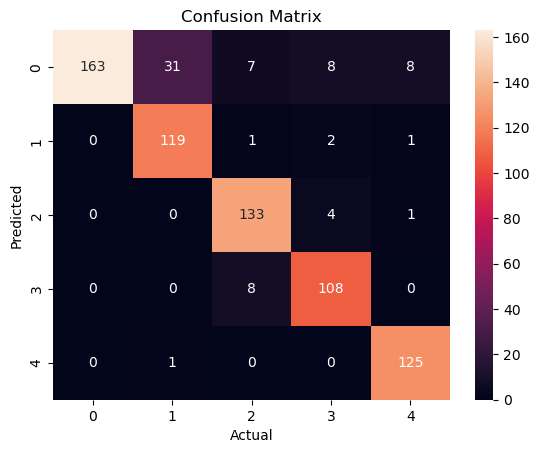

In [29]:
print("Accuracy:", accuracy3)
print(report3)
print(cm3)
ax = plt.subplot()
sns.heatmap(cm3, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()

The voting classifier appears to result in the most accurate classification when using bag of words features, therefore we shall use the voting classifier with bag of words features.

### EMBEDDINGS

### Using RandomForestClassifier

In [31]:
accuracy4, report4, cm4 = rf_clf(X_train_e, X_test_e, y_train_e, y_test_e)


Accuracy: 0.875
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       160
         1.0       0.78      0.90      0.84       153
         2.0       0.92      0.86      0.89       138
         3.0       0.79      0.74      0.77       109
         4.0       0.98      0.88      0.92       160

    accuracy                           0.88       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.88      0.88      0.88       720

[[153   3   1   5   8]
 [  4 137   9  21   4]
 [  1   3 119   2   5]
 [  1   8   9  81   3]
 [  1   2   0   0 140]]


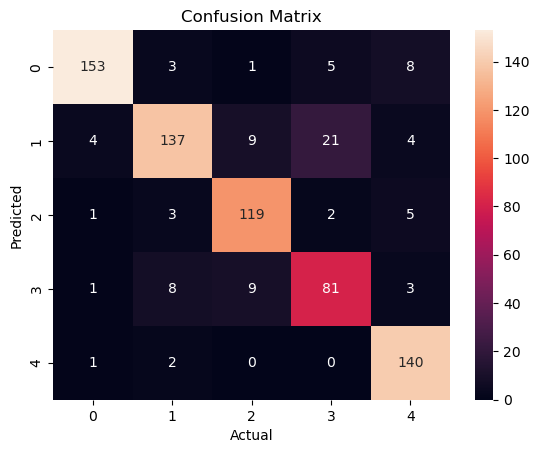

In [32]:
print("Accuracy:", accuracy4)
print(report4)
print(cm4)
ax = plt.subplot()
sns.heatmap(cm4, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()

### Using Bagging

In [33]:
accuracy5, report5, cm5 = baggingClassifier(X_train_e, X_test_e, y_train_e, y_test_e)

Accuracy: 0.9055555555555556
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       160
         1.0       0.95      0.84      0.89       153
         2.0       0.95      0.91      0.93       138
         3.0       0.79      0.85      0.82       109
         4.0       0.96      0.92      0.94       160

    accuracy                           0.91       720
   macro avg       0.90      0.90      0.90       720
weighted avg       0.91      0.91      0.91       720

[[158   7   2   7   9]
 [  0 129   0   6   1]
 [  2   2 125   1   1]
 [  0  12  10  93   2]
 [  0   3   1   2 147]]


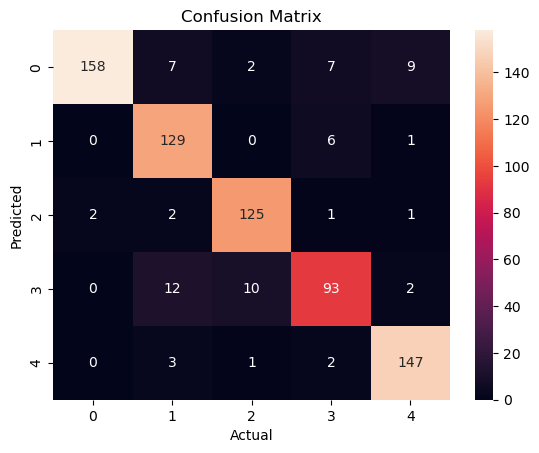

In [34]:
print("Accuracy:", accuracy5)
print(report5)
print(cm5)

ax = plt.subplot()
sns.heatmap(cm5, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()

### Using Voting

In [36]:
accuracy6, report6, cm6 = votingClassifier(X_train_e, X_test_e, y_train_e, y_test_e)


Accuracy: 0.875
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       160
         1.0       0.79      0.92      0.85       153
         2.0       0.95      0.84      0.89       138
         3.0       0.82      0.73      0.77       109
         4.0       1.00      0.87      0.93       160

    accuracy                           0.88       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.88      0.88       720

[[155   5   5   7  12]
 [  4 140   8  21   4]
 [  1   2 116   1   2]
 [  0   6   9  80   3]
 [  0   0   0   0 139]]


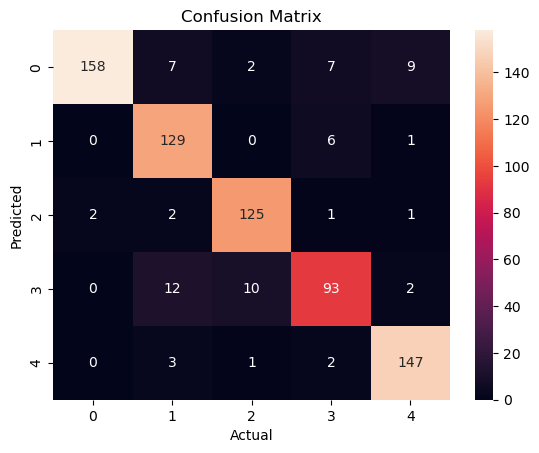

In [37]:
print("Accuracy:", accuracy6)
print(report6)
print(cm6)

ax = plt.subplot()
sns.heatmap(cm5, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()


The bagging classifier gives the most accurate classification when using embeddings, therefore we shall use bagging when working with embeddings.

## Task 4: Theoretical Understanding


KNN - 
BOW: 0.77
EMB: 0.91
AV: 0.84

NN -
BOW:0.89
EMB: 0.91
AV: 0.9 

ENSEMBLE -
BOW
RF:0.89
BAGG: 0.78
VOT: 0.90

EMB
RF:0.88
BAGG: 0.91
VOT: 0.88

RF AV:0.885
BAGG AV:0.845
VOT AV: 0.89

### Q1: Which model performed best and why do you think that is?


Multiple Perceptron Network which is a type of Neural Network performed the best. Neural Networks are better at dealing with a variety of input types and can identify complex relationship between inputs and outputs. There is a wide array of perceptrons that each work to determine outputs which are then improved by exhaustive back propogation. It is good for linear and both non-linear datatypes, but particularly for non-linear with large inputs. Therefore, it works well with both the model.  


### Q2: Which features gave better results for each model? Explain.


Embeddings gave the better accuracy with KNN, NN, and Bagging. Embeddings provided with less sparse, and dense data which correlated with intrinsic relationship between the words. NN is particularly good at picking up on patterns that a normal model cannot pick on. KNN performed well because it is able to better pick up the closest related words which may have similarity in meaning and usage. 

Bag of Words gave better accuracy with Random Forest, and Voting. BOW is more suitable with Random Forest as each words form a divergent branch. The data is also sparse. Unique words can perhaps split datapoints into distinct classes right from the beginning. Thus imporving the accuracy compard to embeddings which is in numerical form. BOW are very domain specific and have close vocabulary for each of our tweet account.  

However, the differences between the accuracies are not too significant between the performances of Embeddings and BOW. That said, Embeddings generally performed well in comparison which could be attributed to its status of being precise and unique and free of errors. 



### Q3: What effect would increasing the classes to 150 have?

If the classes were increased to 150, it would result in a significantly larger dataset. It would be necessary to extract the same number of tweets for each class so that the classes remain balanced. If we extracted 1000 tweets for each class, our resulting dataset would contain 150,000 examples. Such a large dataset will increase the time and space complexities of this entire authorship attribution task. In this case, making bag of words features would take a lot of time. Creating a vocabulary for the dataset and then making bag of words features containing counts of each word in the vocabulary would presumably require a lot of time and memory. Similarly, creating embeddings will also be a time-consuming task. Training kNN, Neural Networks, and Ensemble Models on this dataset will take a long time as well. 

### Q4: Suggest improvements to text preparation, feature extraction, and models that can be made to perform this task better.


The task of authorship attribution of tweets can benefit from some improvements in feature extraction. It might be beneficial to extract the time at which the tweet was made. This is because certain accounts may be more active at certain times of the day as compared to other accounts. Furthermore, it may also help to extract the number of words in a given tweet as well. Certain accounts such as those that belong to individuals instead of organizations may post tweets containing relatively fewer words. These features can thus potentially help in increasing the accuracy with which the model identifies a particular author.

### Q5: What - in your understanding - are the applications of authorship attribution?

Provided that we have enough data regarding works actually published by one author so that we can train our machine learning models on it, authorship attribution can help us identify whether the given text was written by that author or not. This can help in fake-news identification. If there is a statement given that is said to have been made by a prominent person such as a government official or a celebrity, we can test whether that was the case or not through authorship attribution. There was a very wide spread of disinformation during the pandemic and in such cases, state-of-the-art authorship attribution models can help identify whether there is any credibility to a given piece of news. In case of a given couplet, we can classify whether that couplet was written by a specific poet or not with reasonable accuracy considering that such case would be a closed vocabulary system. Old scriptures can similarly be attributed to the appropriate authors, helping in archeological domain. We can even predict the similarity index which can be helpful in plagiarism detection. 